In [46]:
# this jupyter notebook is running inside of the "notebooks" directory
# for relative paths to work properly, we need to set the current working directory to the root of the project
# for imports to work properly, we need to add the code folder to the system path
import os
from os.path import abspath, join, isdir, basename
import sys
if not isdir("notebooks"):
    # if there's a "notebooks" directory in the cwd, we've already set the cwd so no need to do it again
    os.chdir("..")
module_path = abspath("code")
if module_path not in sys.path:
    sys.path.append(module_path)

In [52]:
import numpy as np
import pandas as pd
#import sklearn.metrics as skm
from scipy.stats import pearsonr, spearmanr
import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sns
#import analysis as an

In [53]:
log_dir_CNN1D = "output/training_logs/log_local_local_2023-02-14_14-12-02_nucleation_1iyt_cnn1D-3xk5f32_lr0.0001_bs128_TocXGNj5"
log_dirs = [log_dir_CNN1D]

In [54]:
ds_CNN1D = an.load_predictions(log_dir_CNN1D)
ds_CNN1D.head()

NameError: name 'an' is not defined

In [7]:
metrics_CNN1D = an.load_metrics(log_dir_CNN1D)
metrics_CNN1D

,set,mse,pearsonr,r2,spearmanr,epoch,early
0,train,0.510462,0.919725,0.844308,0.920326,108,True
1,tune,0.740797,0.878691,0.771441,0.879440,108,True
2,test,0.783813,0.870828,0.757749,0.872424,108,True


In [44]:
# this jupyter notebook is running inside of the "notebooks" directory
# for relative paths to work properly, we need to set the current working directory to the root of the project
# for imports to work properly, we need to add the code folder to the system path
import os
from os.path import abspath, join, isdir, basename
import sys
if not isdir("notebooks"):
    # if there's a "notebooks" directory in the cwd, we've already set the cwd so no need to do it again
    os.chdir("..")
module_path = abspath("code")
if module_path not in sys.path:
    sys.path.append(module_path)

['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']


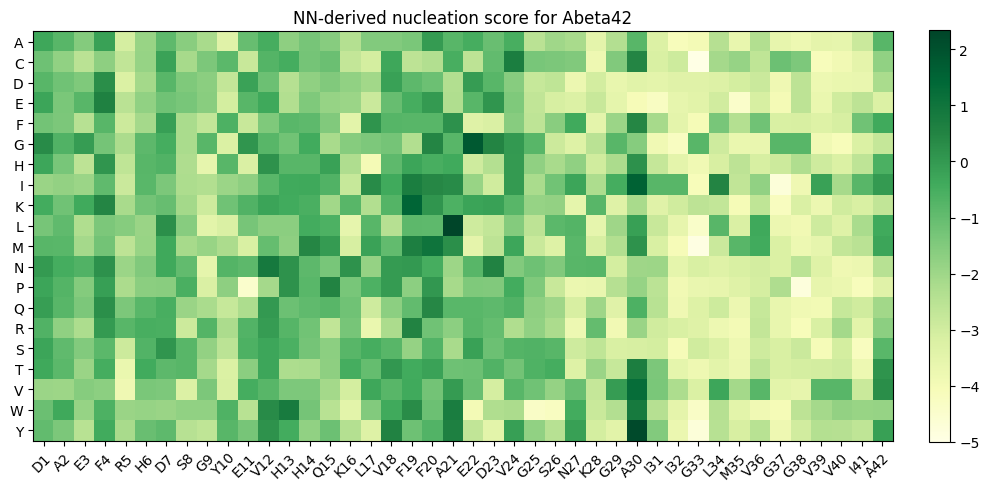

In [55]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

NN_nucleation_loc = join(log_dir_CNN1D, "predictions", "NN_nucleation_tune_predicted_scores.txt")

NN_nucleation_file = open(NN_nucleation_loc, "r")
  
predicted_scores = NN_nucleation_file.read()
predicted_scores = predicted_scores.split("\n")

wt_aa = "DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA"
wt_ofs = 1
chrs = ["A", "C", "D", "E", "F", "G", "H", "I", "K", "L",
         "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y"]

chr_loc = []
scores = []
variants = []

for i in range(len(wt_aa)):
    chr_loc.append(wt_aa[i]+str(i+wt_ofs))
    sc = []
    for j in range(len(chrs)):
        variants.append(wt_aa[i]+str(i+wt_ofs)+chrs[j])
        sc.append(float(predicted_scores[i*len(chrs)+j]))
    scores.append(sc)
    

ds = {"score": scores}
ds = pd.DataFrame(data=ds)

scores = list(map(list, zip(*scores)))

fig, ax = plt.subplots(figsize=(10, 5))
im = ax.imshow(scores, cmap="YlGn")

cbar_kw = {}
cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw, fraction=0.0225, pad=0.04)

# Show all ticks and label them with the respective list entries
ax.set_yticks(np.arange(len(chrs)))
ax.set_yticklabels(chrs)
ax.set_xticks(np.arange(len(chr_loc)))
ax.set_xticklabels(chr_loc)
                   
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("NN-derived nucleation score for Abeta42")
fig.tight_layout()
plt.show()


/var/folders/2z/zn5ysvk957qcm2_x_ydh3c080000gn/T/ipykernel_91207/1885748453.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(chrs)


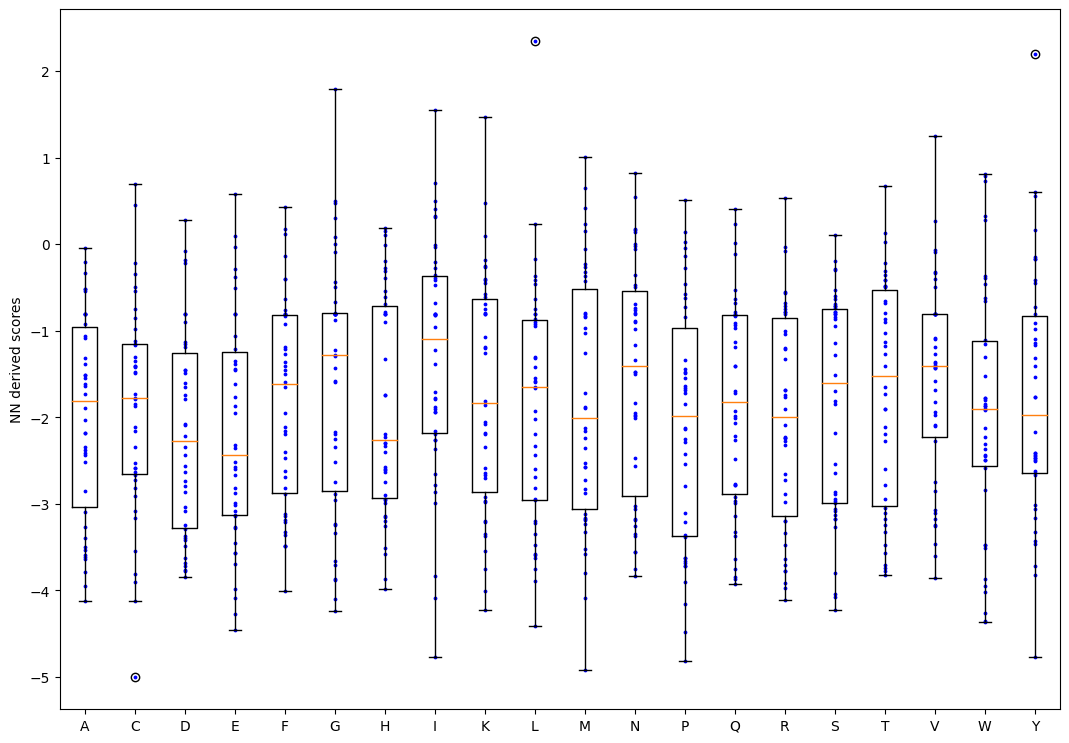

In [110]:
import matplotlib.cm as cm

fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(chrs)
# Creating plot
bp = ax.boxplot(scores)
# show plot
#colors = cm.rainbow(np.linspace(0, 1, len(scores)))
for i, r in enumerate(scores):
    for d in r:
    #for d, c in zip(r, colors):
        y = d
        x = i+1
        plt.scatter(x, y, color='blue', s=3)#, color=c)

plt.ylabel("NN derived scores")
#ax.legend(chr_loc)
plt.show()

/var/folders/2z/zn5ysvk957qcm2_x_ydh3c080000gn/T/ipykernel_91207/2677602462.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(chr_loc, rotation=45)


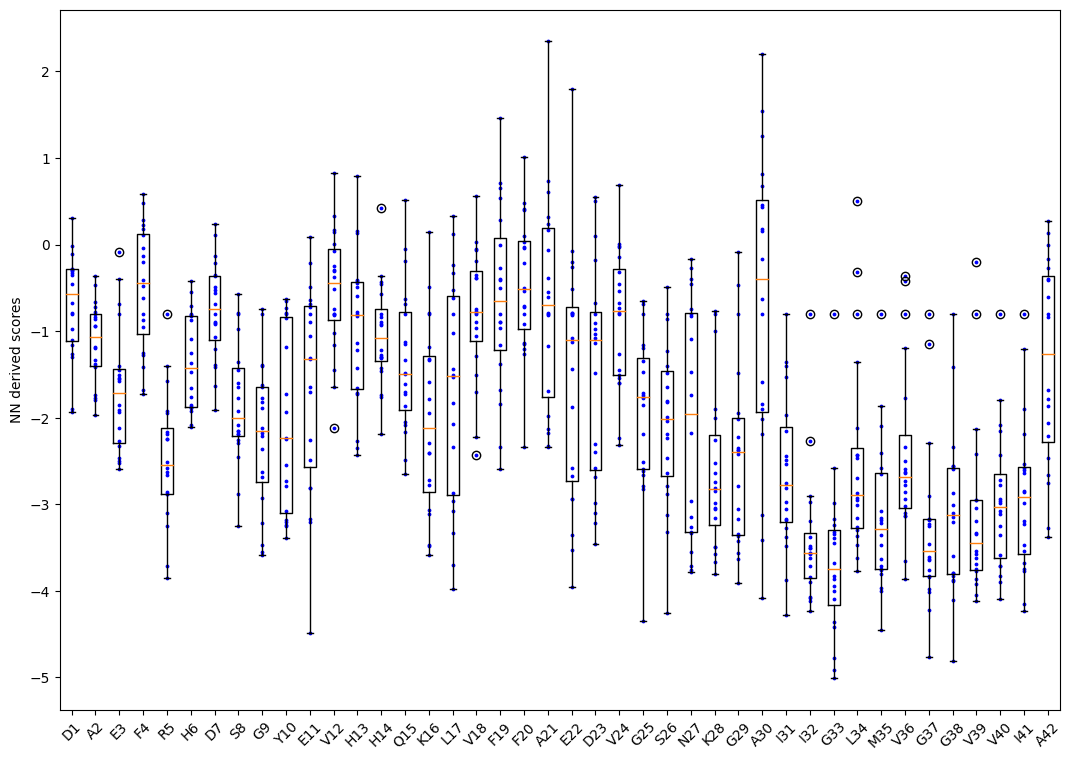

In [109]:
scoresT = np.array(scores).T.tolist()
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(chr_loc, rotation=45)
# Creating plot
bp = ax.boxplot(scoresT)
for i, r in enumerate(scoresT):
    for j, d in enumerate(r):
        y = d
        x = i+1
        plt.scatter(x, y, color='blue', s=3)

#plt.legend(chrs)
# show plot
plt.ylabel("NN derived scores")
plt.show()

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [59]:
def quantile_normalize(df):
    """
    input: dataframe with numerical columns
    output: dataframe with quantile normalized values
    """
    df_sorted = pd.DataFrame(np.sort(df.values,
                                     axis=0), 
                             index=df.index, 
                             columns=df.columns)
    df_mean = df_sorted.mean(axis=1)
    df_mean.index = np.arange(1, len(df_mean) + 1)
    df_qn =df.rank(method="min").stack().astype(int).map(df_mean).unstack()
    return(df_qn)

In [88]:
nucleation_dir = "data/GSE151147"

nucleation_loc = join(nucleation_dir, "nucleation.tsv")

nucleation_file = open(nucleation_loc, "r")

nucleation = nucleation_file.read()
nucleation = nucleation.split("\n")

single_nucleation = nucleation[1:500]

single_mutation = []
for sn in single_nucleation:
    single_mutation.append(sn.split("\t")[0])

In [123]:
single_dir = "output/training_logs/log_local_local_2023-02-15_15-25-06_nucleation_1iyt_cnn1D-3xk5f32_lr0.0001_bs128_TxYMvR9a"

single_predicted_loc = join(single_dir, "predictions", "single_predicted_scores.txt")
single_true_loc = join(single_dir, "predictions", "single_true_scores.txt")

single_predicted_file = open(single_predicted_loc, "r")
single_true_file = open(single_true_loc, "r")
  
single_predicted_scores = single_predicted_file.read()
single_predicted_scores = single_predicted_scores.split("\n")

single_predicted_scores = list(map(float, single_predicted_scores[:-1]))

single_true_scores = single_true_file.read()
single_true_scores = single_true_scores.split("\n")

single_true_scores = list(map(float, single_true_scores[:-1]))



In [140]:
dic_predicted = {single_mutation[i]: single_predicted_scores[i] for i in range(len(single_mutation)) if '*' not in single_mutation[i]}                  
dic_true = {single_mutation[i]: single_true_scores[i] for i in range(len(single_mutation)) if '*' not in single_mutation[i]} 

df = pd.DataFrame({'Quantile normalized nn-derived score': dic_predicted,
                  'Quantile normalized raw DMS score': dic_true})


In [148]:
len(dic_true)

468

In [141]:
df_sorted = pd.DataFrame(np.sort(df.values, axis=0), index=df.index, columns=df.columns)
df_mean = df_sorted.mean(axis=1)
df_mean.index = np.arange(1, len(df_mean) + 1)
df.rank(method="min").astype(int)
df.rank(method="min").stack().astype(int)
df_qn =df.rank(method="min").stack().astype(int).map(df_mean).unstack()

In [215]:
# compute quantile normalized data
df_qn=quantile_normalize(df)

In [216]:
print(df_qn.loc[['A2V', 'H6R', 'D7H', 'D7N', 'E11K', 'A21G', 'E22G', 'E22K', 'E22Q', 'D23N', 'A42T']])

      Quantile normalized nn-derived score  Quantile normalized raw DMS score
A2V                              -1.523321                          -1.755225
H6R                              -0.201297                          -0.258121
D7H                              -0.303146                           0.040586
D7N                               0.005858                          -0.130725
E11K                             -0.306298                          -0.247799
A21G                             -0.398790                          -0.219414
E22G                              2.088456                           2.088456
E22K                              0.112409                           0.158764
E22Q                             -0.425542                           1.635320
D23N                              0.851044                           0.678839
A42T                              0.451599                           0.136903


In [237]:
dens = density(df_qn)

NameError: name 'density' is not defined

AttributeError: 'function' object has no attribute 'data'

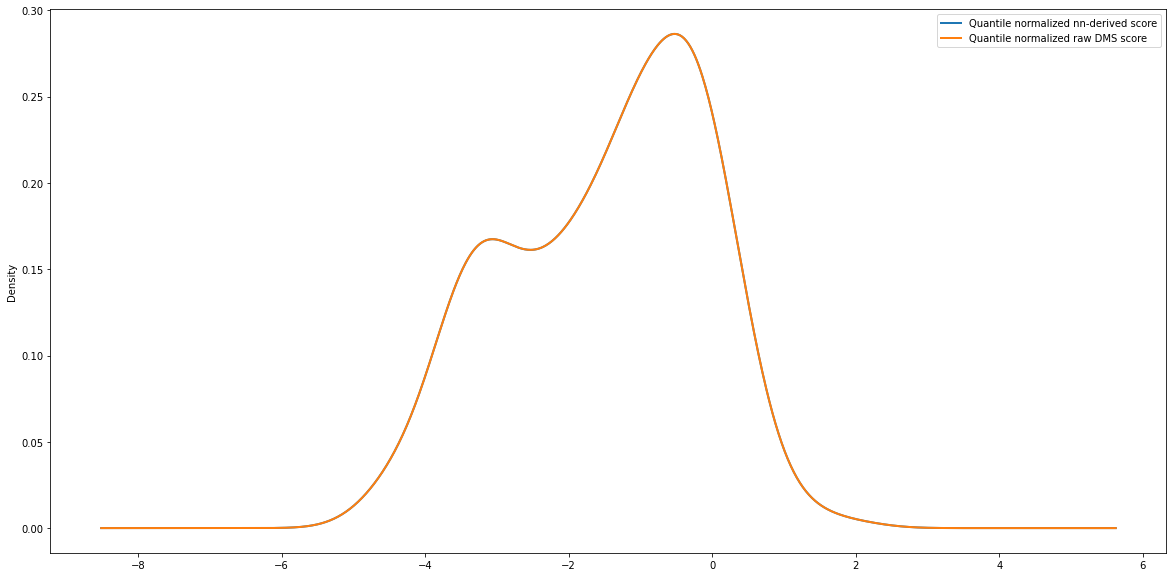

In [250]:
df_qn.plot.density(linewidth=2, figsize=(20, 10))
print(p)
plt.plot(-0.5, .3, 'bo')
plt.ylim([0.0, 0.35])
plt.xlim([-6.2, 2.2])
plt.title("N = 468", y=-.1)
plt.legend(loc=2, borderaxespad=3)
plt.savefig('Density_plot_after_Quantile_Normalization.png',dpi=180)

499


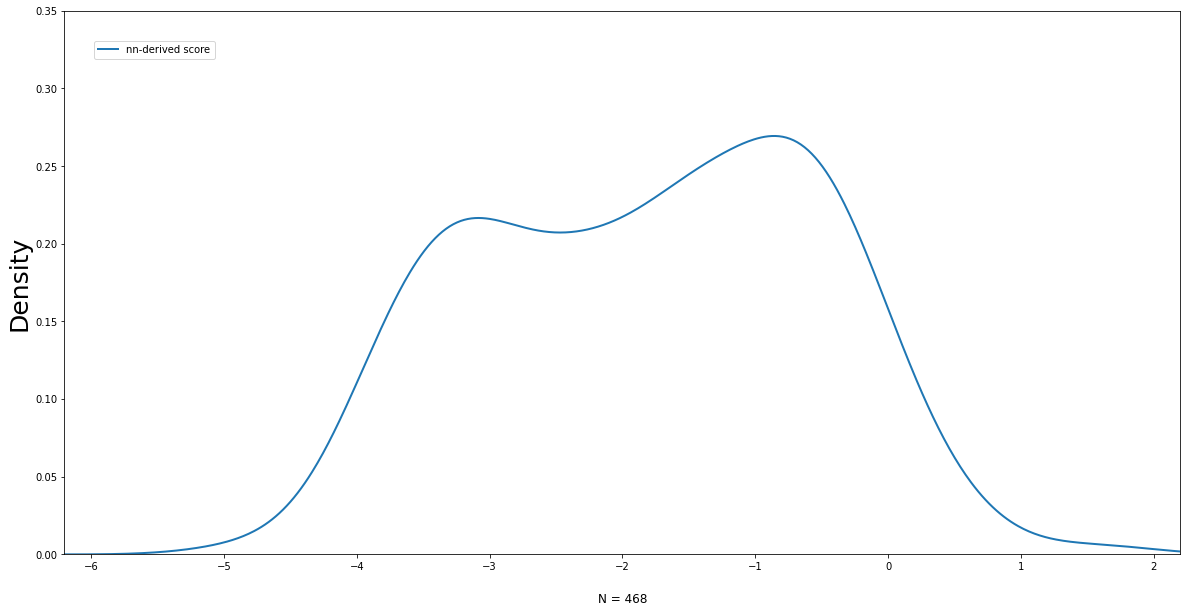

In [225]:
dic_predicted_ = {single_mutation[i]: single_predicted_scores[i] for i in range(len(single_mutation))}

df_predicted = pd.DataFrame({'nn-derived score': dic_predicted})

df_predicted.plot.density(linewidth=2, figsize=(20, 10))
plt.ylim([0.0, 0.35])
plt.xlim([-6.2, 2.2])
plt.title("N = 468", y=-.1)
plt.legend(loc=2, borderaxespad=3)

plt.ylabel('Density', fontsize=25)

plt.savefig('Density_nn_derived.png',dpi=180)

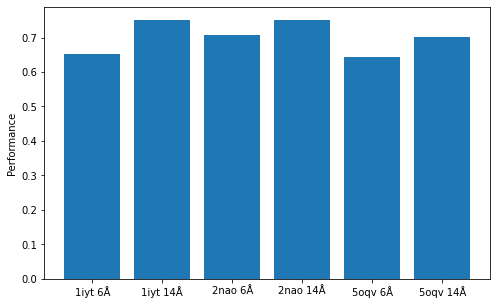

In [252]:
import numpy as np
import matplotlib.pyplot as plt

gcn_data = {'1iyt 6Å': 0.653260,
'1iyt 14Å': 0.750725,
'2nao 6Å': 0.708122,
'2nao 14Å': 0.749644,
'5oqv 6Å': 0.644522,
'5oqv 14Å': 0.702272}


gcn_par = list(gcn_data.keys())
values = list(gcn_data.values())

fig = plt.figure(figsize = (8, 5))
plt.bar(gcn_par, values)
plt.ylabel("Performance")
#plt.suptitle("GCN Networks' Performance")
plt.show()

<ipython-input-251-c972b3b411dd>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  nuc.set_xticklabels(nuc_par, rotation=45)
<ipython-input-251-c972b3b411dd>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  var.set_xticklabels(var_par, rotation=45)
<ipython-input-251-c972b3b411dd>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  syn.set_xticklabels(syn_par, rotation=45)


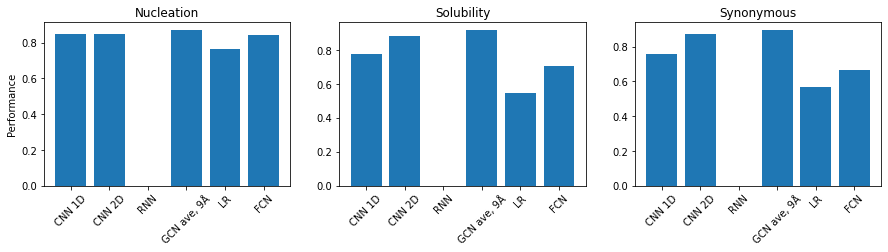

In [251]:
nuc_gcn_avg = (0.867950 + 0.872802 + 0.868550) / 3.0
var_gcn_avg = (0.921706 + 0.916060 + 0.910334) / 3.0
syn_gcn_avg = (0.899524 + 0.894756 + 0.891269) / 3.0

nuc_data = {'CNN 1D': 0.849948, 'CNN 2D': 0.846135, 'RNN': 0.0, 'GCN ave, 9Å': nuc_gcn_avg, 'LR': 0.762649, 'FCN': 0.845643}
var_data = {'CNN 1D': 0.774639, 'CNN 2D': 0.882056, 'RNN': 0.0, 'GCN ave, 9Å': var_gcn_avg, 'LR': 0.544730, 'FCN': 0.703211}
syn_data = {'CNN 1D': 0.759207, 'CNN 2D': 0.871591, 'RNN': 0.0, 'GCN ave, 9Å': syn_gcn_avg, 'LR': 0.570620, 'FCN': 0.667115}

nuc_par = list(nuc_data.keys())
nuc_values = list(nuc_data.values())

var_par = list(var_data.keys())
var_values = list(var_data.values())

syn_par = list(syn_data.keys())
syn_values = list(syn_data.values())

fig, (nuc, var, syn) = plt.subplots(1, 3, figsize = (15, 3))

nuc.bar(nuc_par, nuc_values)
nuc.set_xticklabels(nuc_par, rotation=45)
nuc.title.set_text('Nucleation')
nuc.set_ylabel("Performance")

var.bar(var_par, var_values)
var.set_xticklabels(var_par, rotation=45)
var.title.set_text('Solubility')

syn.bar(syn_par, syn_values)
syn.set_xticklabels(syn_par, rotation=45)
syn.title.set_text('Synonymous')